In [33]:
import os
from glob import glob

import matplotlib.pyplot as plt
from top2vec import Top2Vec
from wordcloud import WordCloud

from config import Config
from risk_detection.utils import get_file_name_without_ext

In [2]:
base_dir = os.path.join(Config.top2vec_models_dir(), 'yearly_models', '*')
model_filenames = glob(base_dir)

In [12]:
models = dict()
for model_name in model_filenames:
    year, _ = get_file_name_without_ext(model_name).split('_')
    year = int(year)
    models[year] = Top2Vec.load(model_name)

In [38]:
def generate_wordcloud(model, topic_num, filename=None):
    word_score_dict = dict(zip(model.topic_words[topic_num], model.topic_word_scores[topic_num]))
    plt.figure(figsize=(20, 12),
                   dpi=200)
    plt.axis("off")
    fig = WordCloud(width=2000, height=1200,
                    background_color='white').generate_from_frequencies(word_score_dict)
    plt.imshow(fig)
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    
    plt.title("Topic " + str(topic_num), loc='left', fontsize=25, pad=20)

## Different Industry Topics

In [56]:
models[2006].search_topics(keywords=['oil'], num_topics=2)

([array(['drilling', 'oil', 'exploration', 'oil and gas property', 'drill',
         'oil and natural gas price', 'oil and natural gas property', 'gas',
         'oil and natural gas reserve', 'proved reserve',
         'oil and gas reserve', 'well', 'estimate proved reserve',
         'oil and natural gas production', 'oil and natural gas industry',
         'oil and gas industry', 'drilling operation',
         'oil and gas production', 'cratering', 'blowout',
         'oil and gas price', 'oil and gas operation', 'drill rig',
         'drilling rig', 'recoverable reserve', 'drilling activity',
         'future net cash flow', 'exploitation', 'natural gas',
         'estimate quantity', 'oil spill', 'development expenditure',
         'additional reserve', 'production', 'present value',
         'irregularity', 'current market value', 'future rate',
         'operating hazard', 'transportation facility', 'operating risk',
         'pollution', 'oil and gas company', 'processing facil

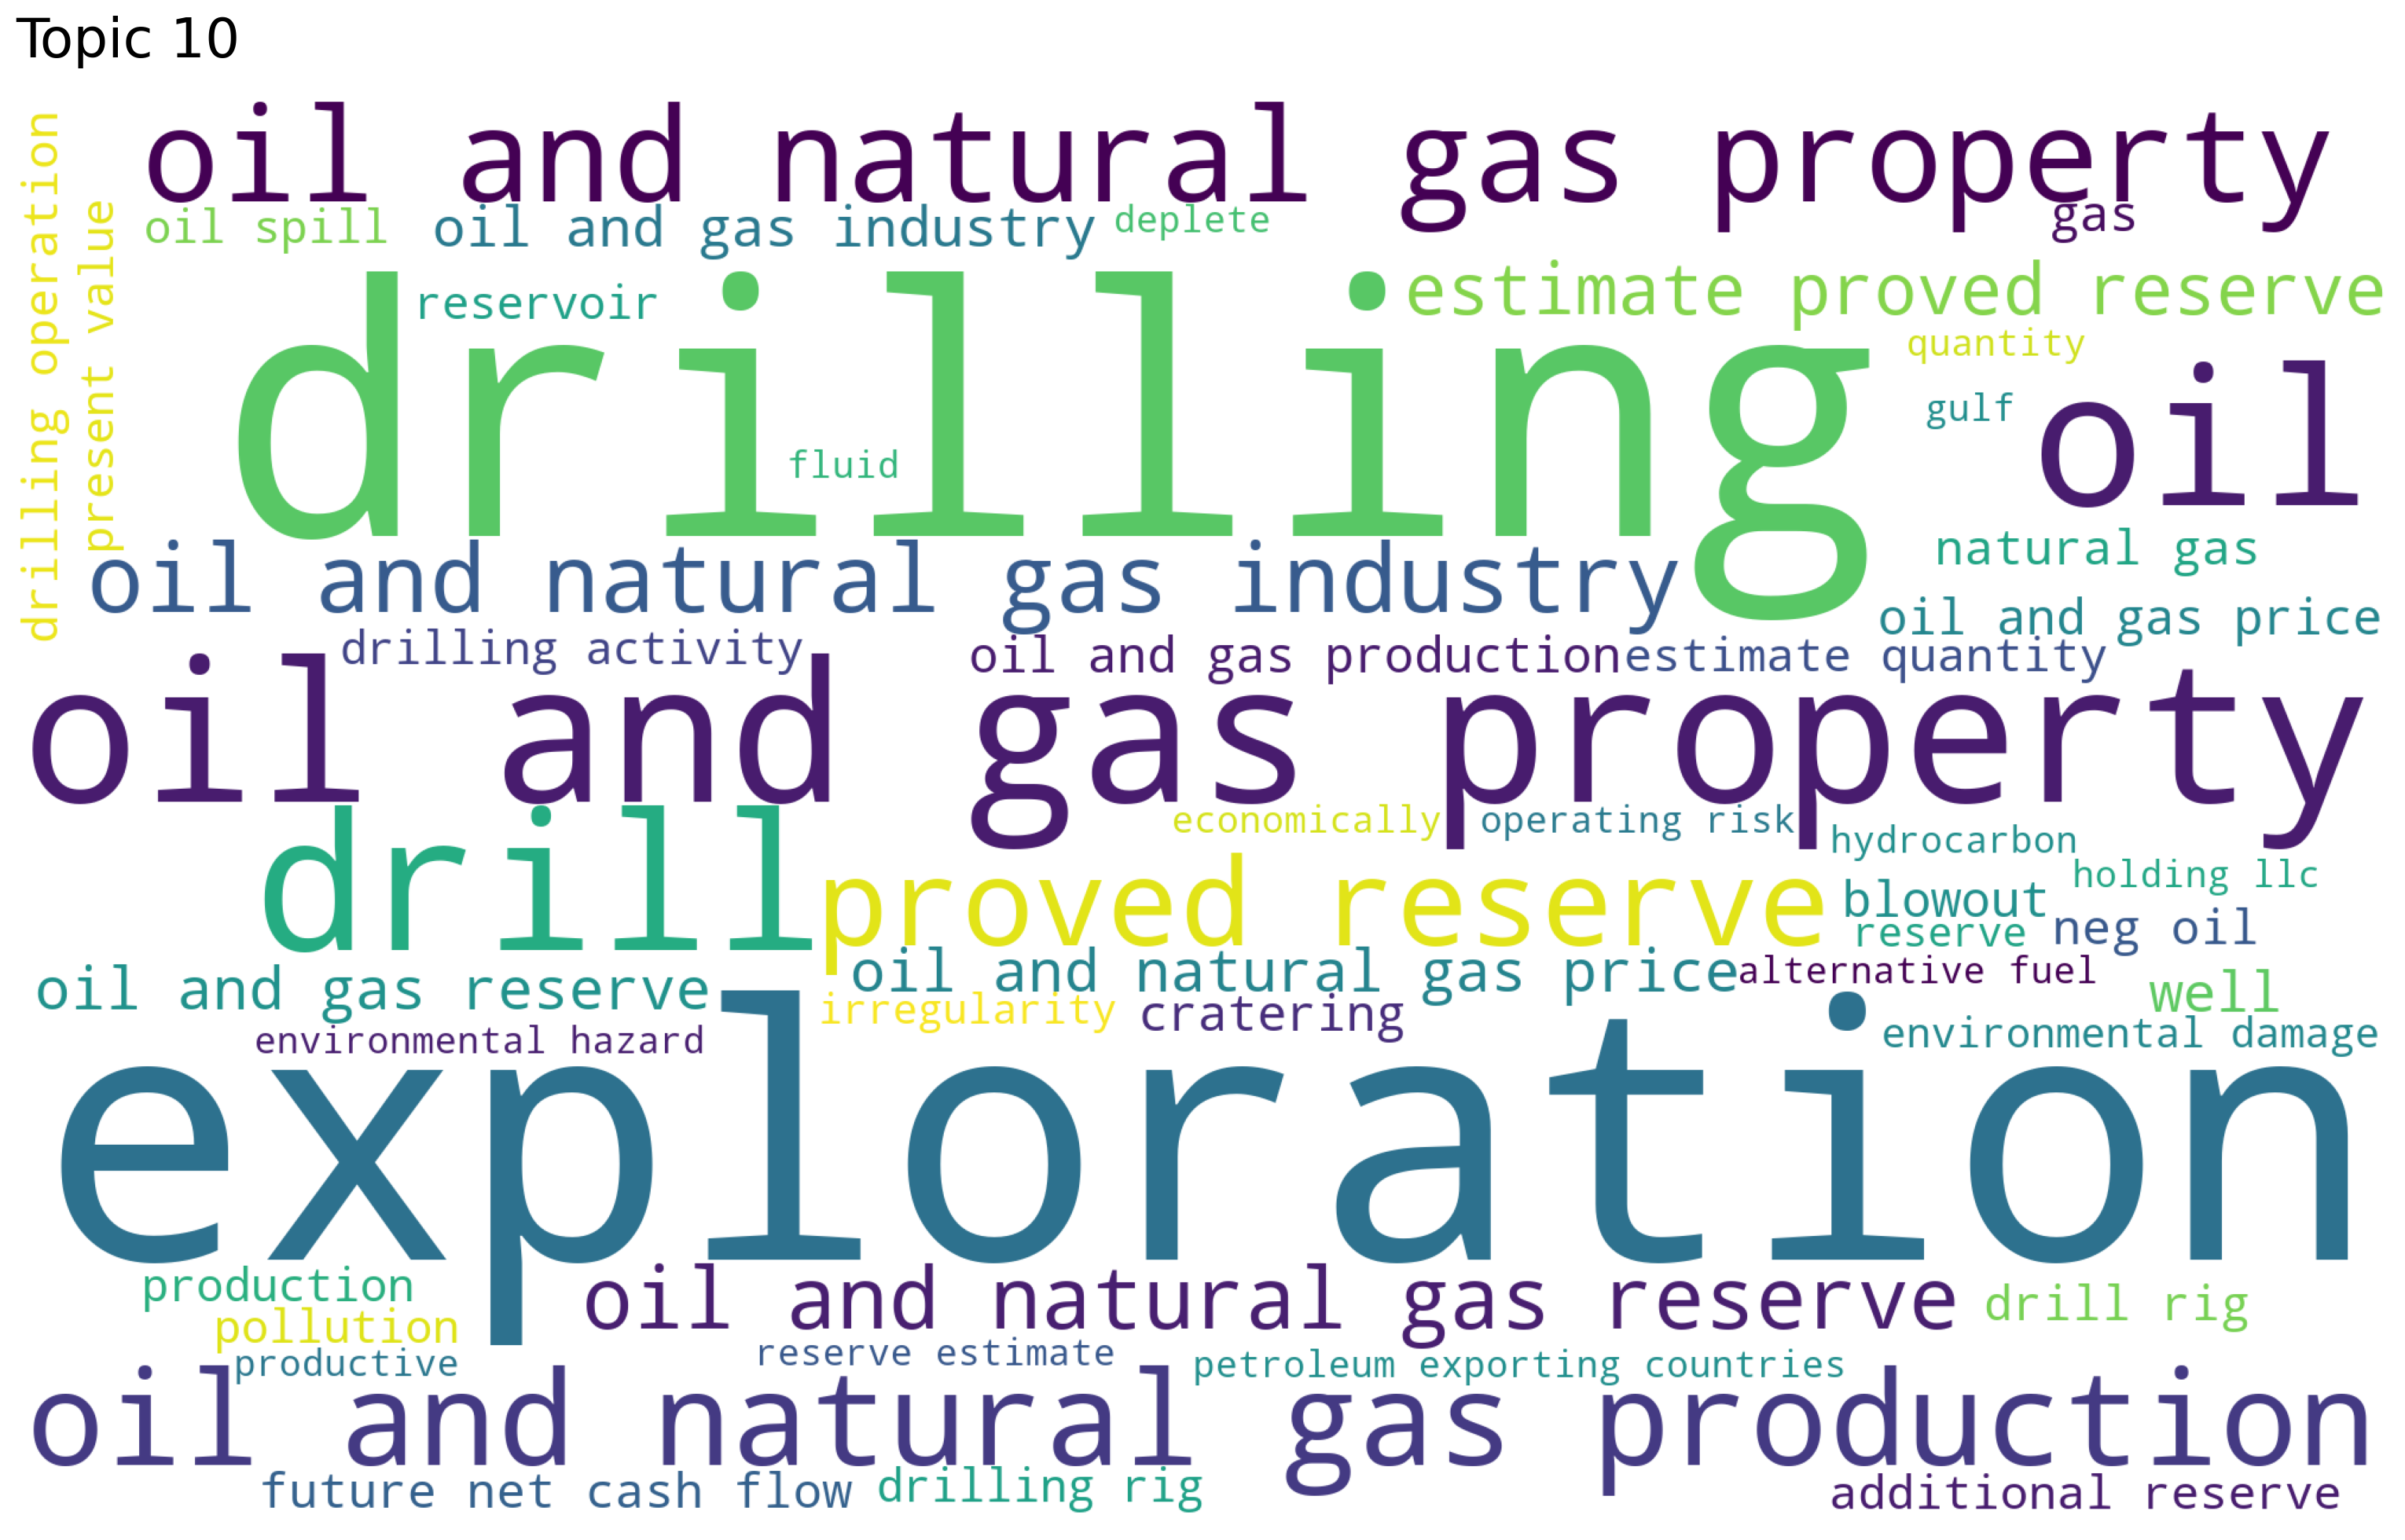

In [55]:
generate_wordcloud(models[2005], 10, filename='plots\\2005_oil_gas_topics.jpg')

## Internet Topics

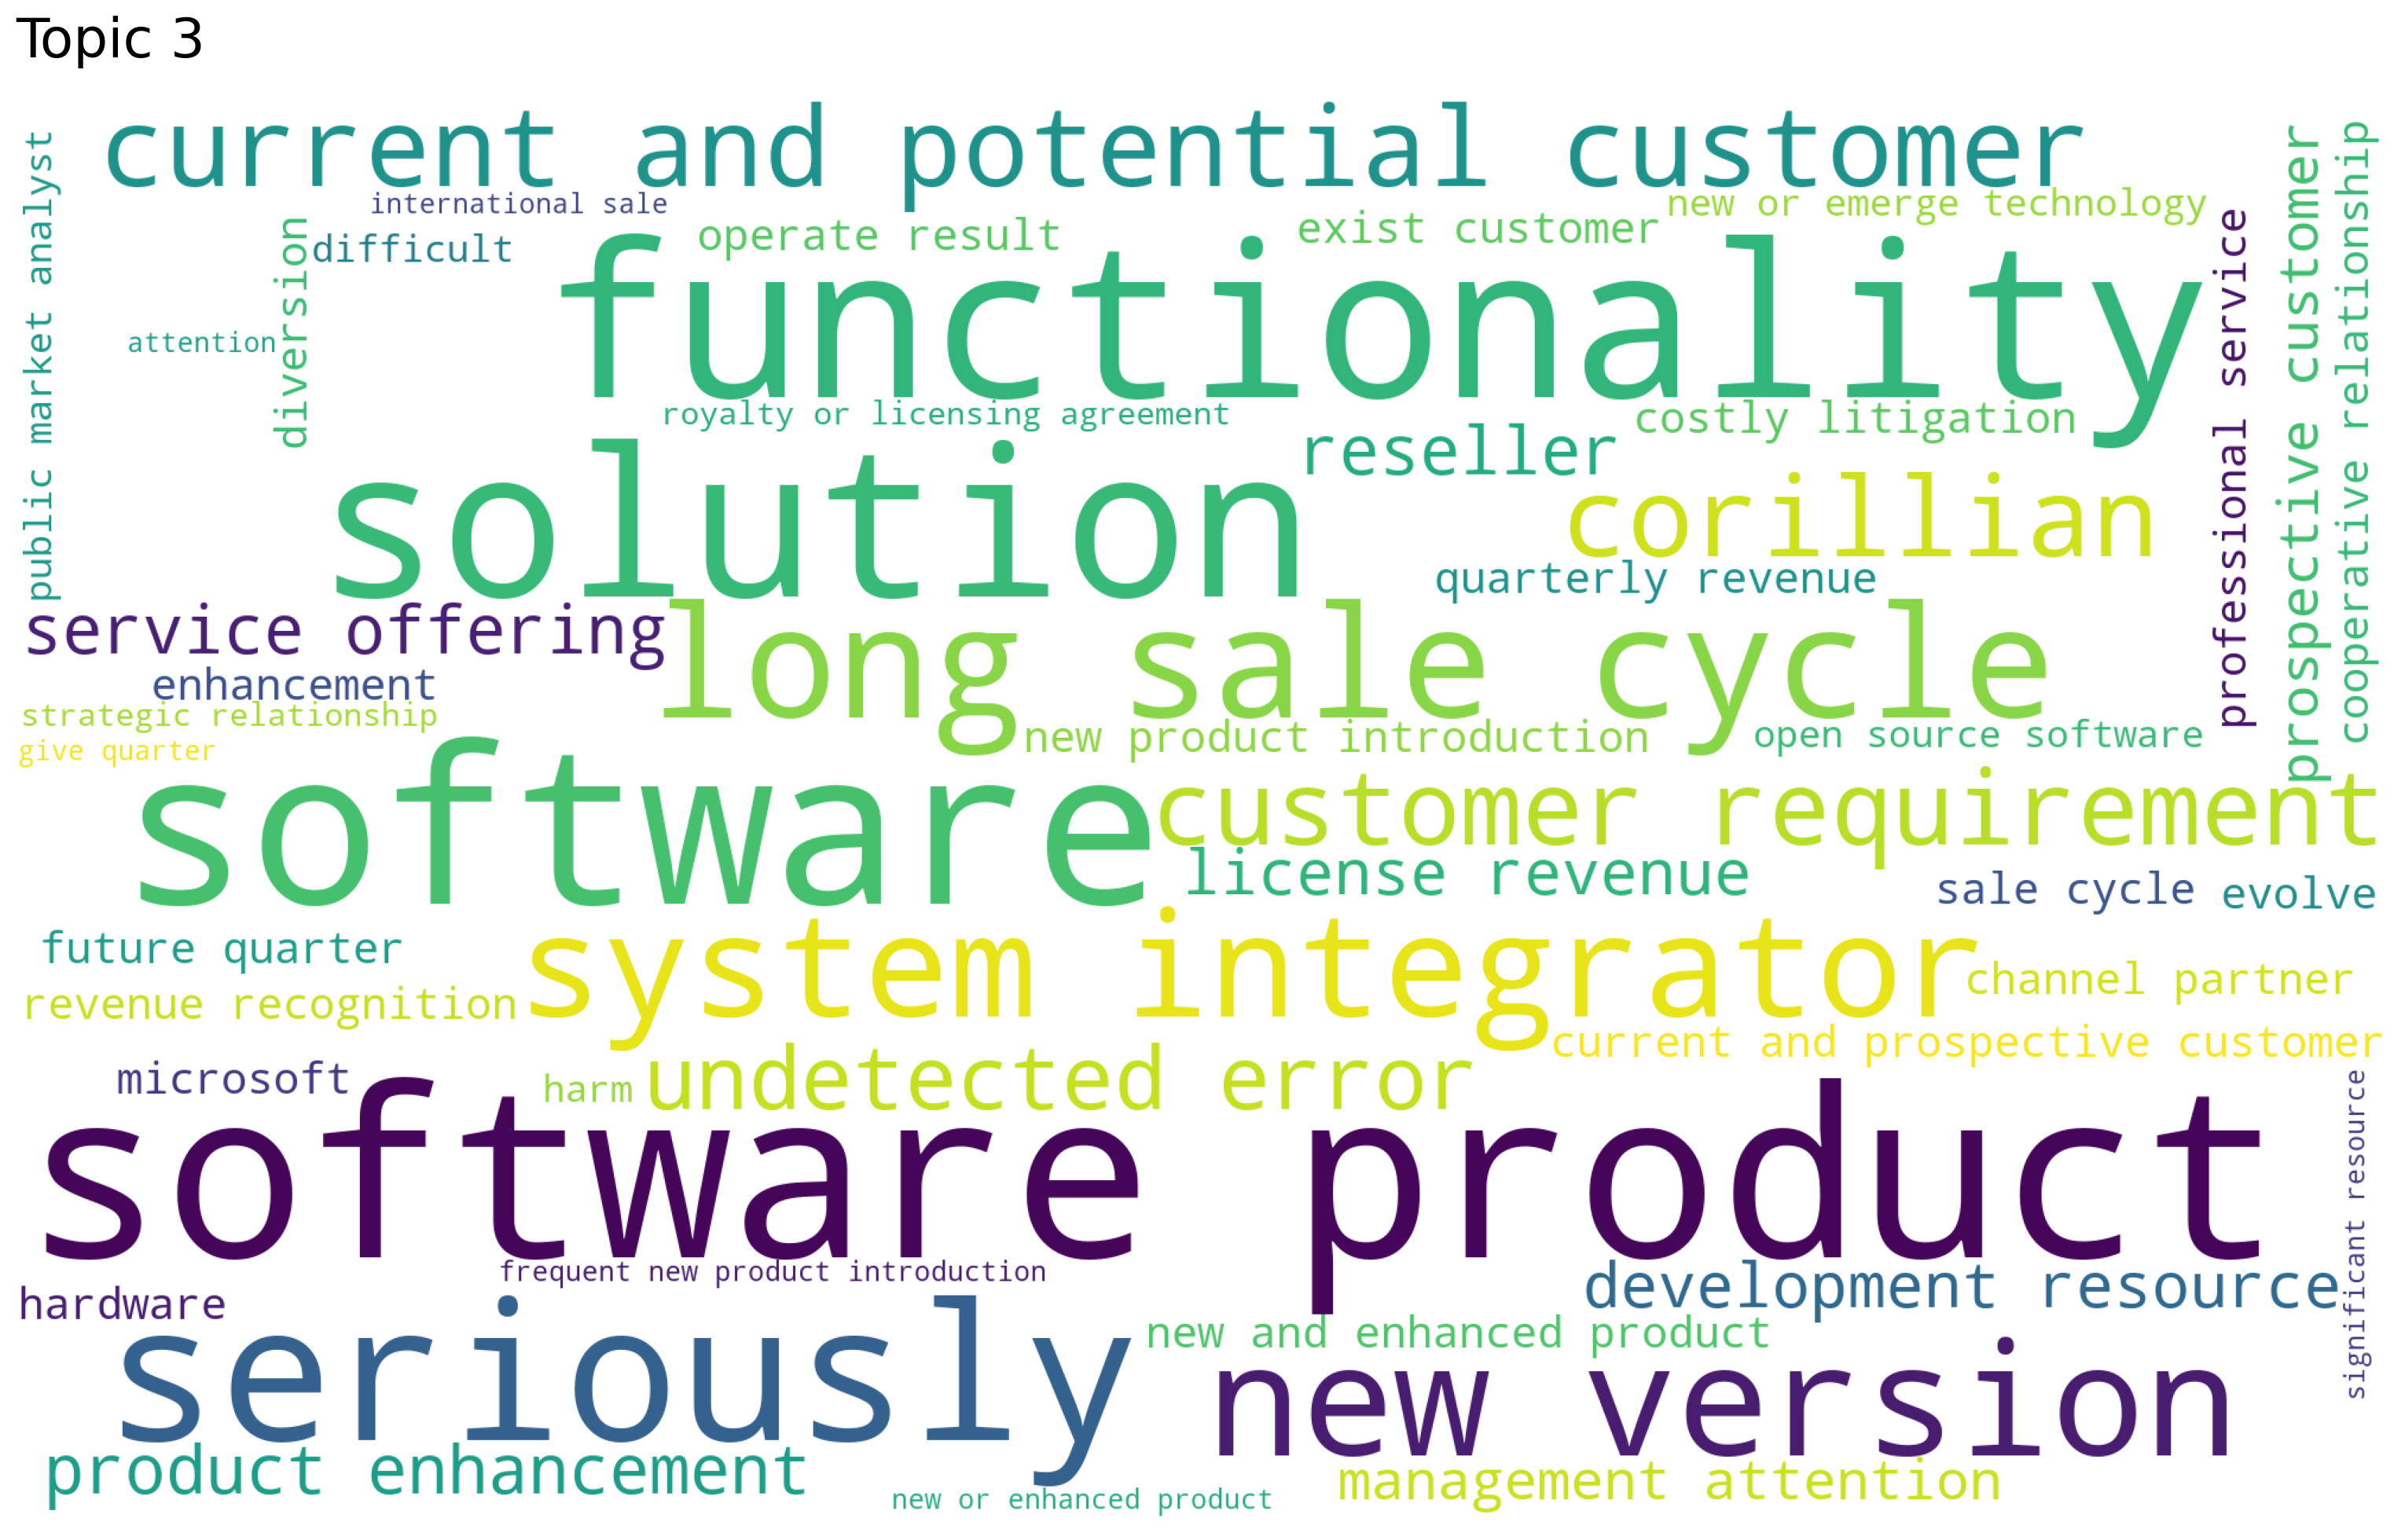

In [44]:
generate_wordcloud(models[2005], topic_num=3, filename='plots\\2005_internet_topics.jpg')

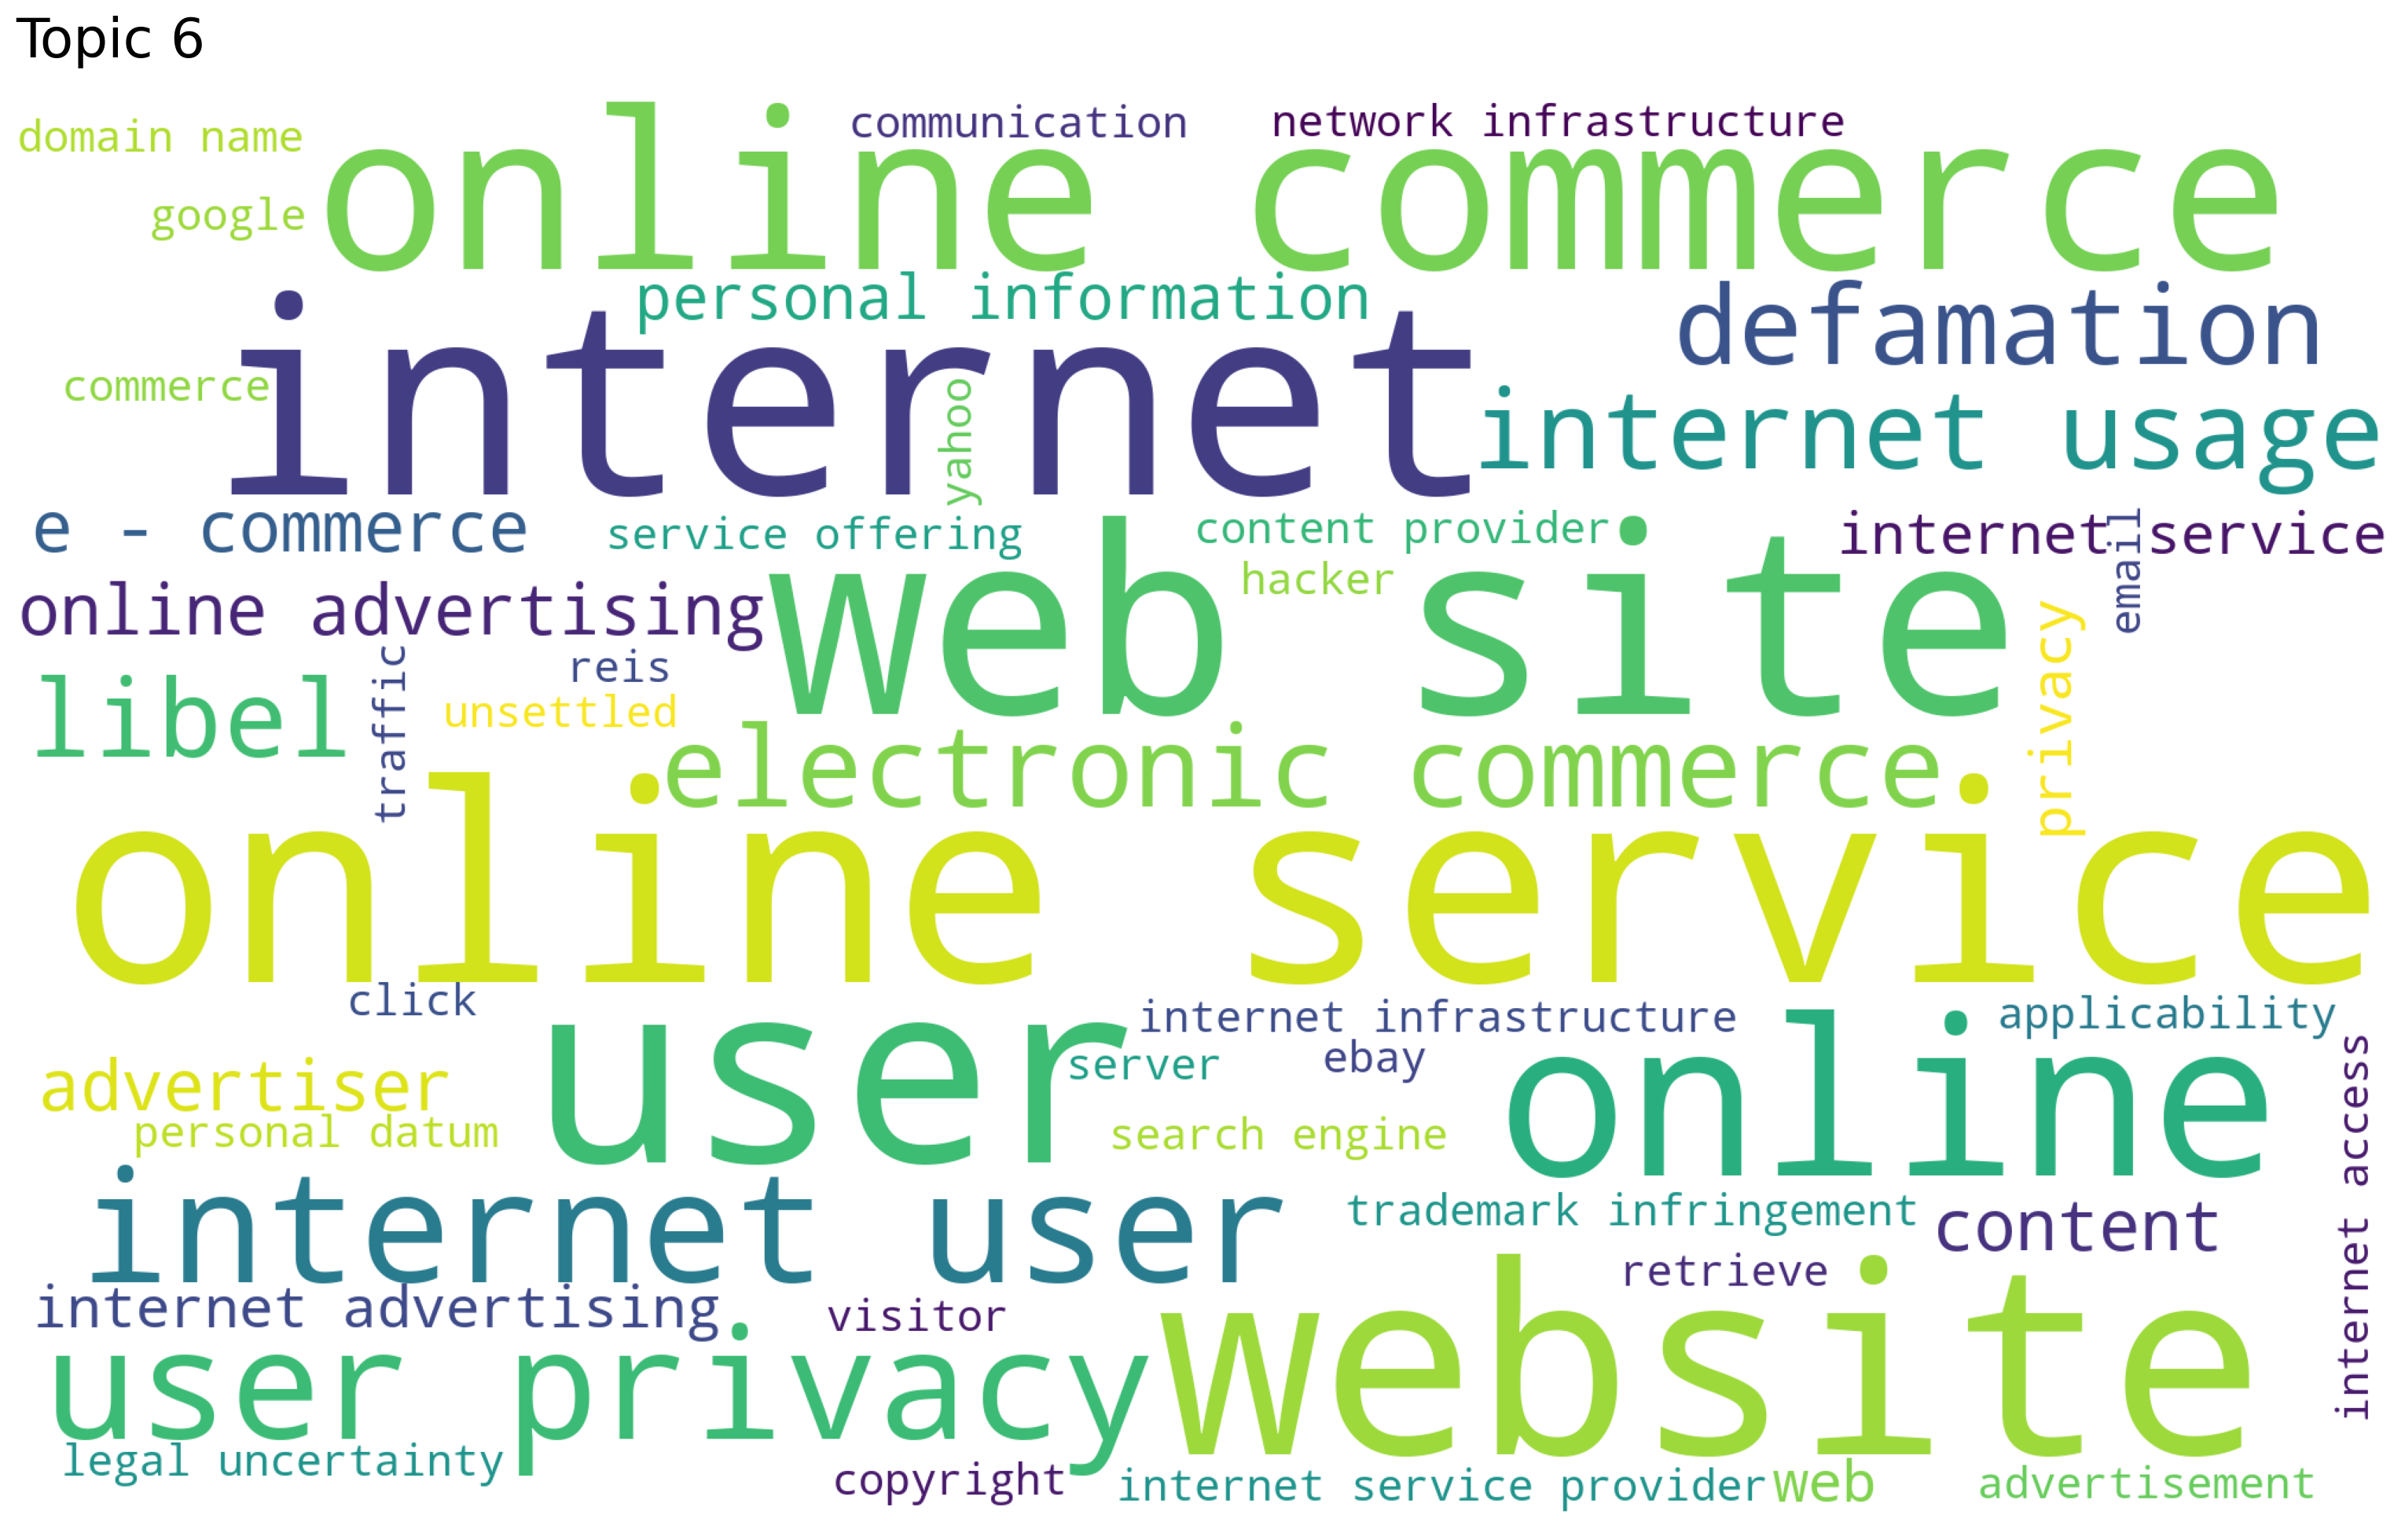

In [45]:
generate_wordcloud(models[2006], topic_num=6, filename='plots\\2006_internet_topics.jpg')

In [13]:
for year, model in models.items():
    print(f'{year}: {model.get_num_topics()}')

2005: 25
2006: 33
2007: 34
2008: 33
2009: 36
2010: 33
2011: 37
2012: 35
2013: 35
2014: 36
2015: 25
2016: 2
